# `datetime`, and `matplotlib` intro

This lesson rounds out the introductory pandas work and introduces our basic plotting library `matplotlib`.  

**OBJECTIVES**

- Understand and use `datetime` objects in pandas DataFrames
- Use `matplotlib` to produce basic plots from data
- Understand when to use histograms, boxplots, line plots, and scatterplots with data


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## `datetime`

A special type of data for pandas are entities that can be considered as dates.  We can create a special datatype for these using `pd.to_datetime`, and access the functions of the `datetime` module as a result.

In [2]:
# read in the sales data
url = 'https://raw.githubusercontent.com/jfkoehler/bootcamp_spr25/refs/heads/main/data/product_sales.csv'

#read_csv


In [3]:
#info


In [4]:
# convert to datetime


In [5]:
# extract the month


In [6]:
# extract the day


In [7]:
# set date to be index of data


In [8]:
# sort the index


In [9]:
# select 2023


In [10]:
from datetime import datetime

In [11]:
# what time is it?
then = datetime.now()
then

datetime.datetime(2026, 2, 11, 15, 54, 12, 241752)

In [12]:
# how much time has passed?
datetime.now() - then

datetime.timedelta(microseconds=8903)

### More with timestamps

- Date times: A specific date and time with timezone support. Similar to datetime.datetime from the standard library.

- Time deltas: An absolute time duration. Similar to datetime.timedelta from the standard library.


In [13]:
# create a pd.Timedelta
delta = pd.Timedelta('1W')

In [14]:
# shift a date by 3 months
datetime.now() + delta

datetime.datetime(2026, 2, 18, 15, 54, 12, 263635)

#### Problems

In [15]:
ufo_url = 'https://raw.githubusercontent.com/jfkoehler/bootcamp_spr25/refs/heads/main/data/ufo.csv'

1. Return to the ufo data and convert the Time column to a datetime object.

2. Set the Time column as the index column of the data.

3. Sort it

4. Create a new dataframe with ufo sightings since January 1, 1999

### Grouping with Dates

An operation similar to that of the `groupby` function can be used with dataframes whose index is a datetime object.  This is the `resample` function, and the groups are essentially a time period like week, month, year, etc. 

In [16]:
dow = sns.load_dataset('dowjones')

In [17]:
#check the info
dow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    649 non-null    datetime64[ns]
 1   Price   649 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.3 KB


In [18]:
#handle the index
dow.set_index('Date', inplace = True)

In [19]:
#check that things changed
dow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 649 entries, 1914-12-01 to 1968-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   649 non-null    float64
dtypes: float64(1)
memory usage: 10.1 KB


In [20]:
dow.head()

,Price
Date,
1914-12-01,55.00
1915-01-01,56.55
1915-02-01,56.00
1915-03-01,58.30
1915-04-01,66.45


In [21]:
#average yearly price
dow.resample('M').mean()

/var/folders/8v/7bhy8yqn04b7rzqglb2s38200000gn/T/ipykernel_31003/3412779598.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dow.resample('M').mean()


,Price
Date,
1914-12-31,55.00
1915-01-31,56.55
1915-02-28,56.00
1915-03-31,58.30
1915-04-30,66.45
...,...
1968-08-31,883.72
1968-09-30,922.80
1968-10-31,955.47


In [22]:
#quarterly maximum price
dow.resample('Q').max()

/var/folders/8v/7bhy8yqn04b7rzqglb2s38200000gn/T/ipykernel_31003/2439399997.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dow.resample('Q').max()


,Price
Date,
1914-12-31,55.00
1915-03-31,58.30
1915-06-30,68.40
1915-09-30,85.50
1915-12-31,97.00
...,...
1967-12-31,907.54
1968-03-31,884.77
1968-06-30,906.82


### Exploratory Data Analysis

> In statistics, exploratory data analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell beyond the formal modeling and thereby contrasts with traditional hypothesis testing, in which a model is supposed to be selected before the data is seen. Exploratory data analysis has been promoted by John Tukey since 1970 to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. --[Wikipedia](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

#### Example: Tips Dataset

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. 

In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law the restaurant offered seating in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

In [23]:
tips = sns.load_dataset('tips')

In [24]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## Introduction to `matplotlib`

Now, let us turn our attention to plotting data.  We begin with basic plots, and later explore some customization and additional plots.  For these exercises, we will use the stock price data and a dataset about antarctic penguins from the `seaborn` library.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

### Line Plots with Matplotlib

To begin, select the `total_bill` column of the data.  

In [27]:
#create a new column based on percent tipped
tips['tip_pct'] = ''

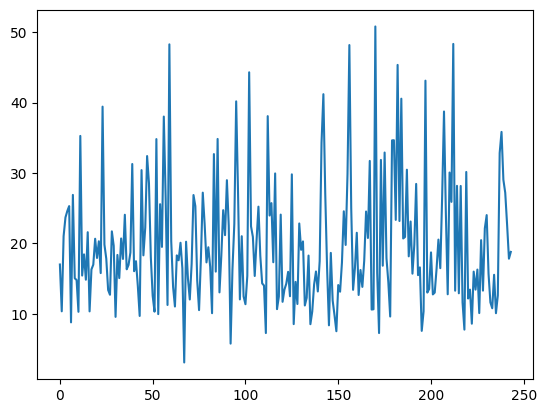

In [28]:
### plt.plot
plt.plot(tips['total_bill'])

<Axes: >

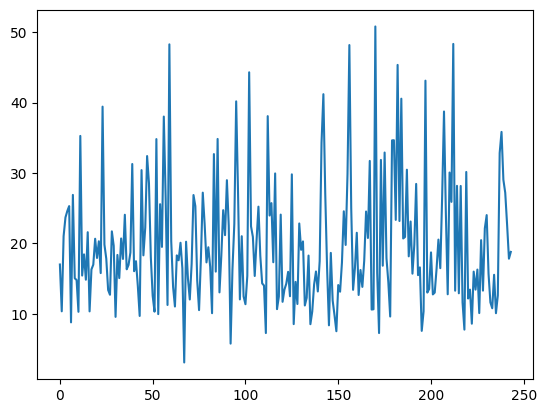

In [29]:
### use the series
tips['total_bill'].plot()

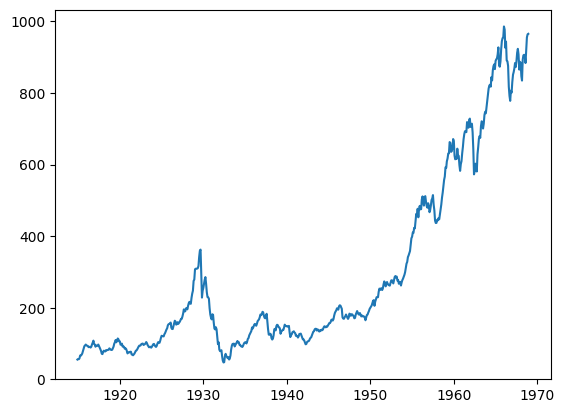

In [30]:
#plot dow jones Price with matplotlib
plt.plot(dow)

<Axes: xlabel='Date'>

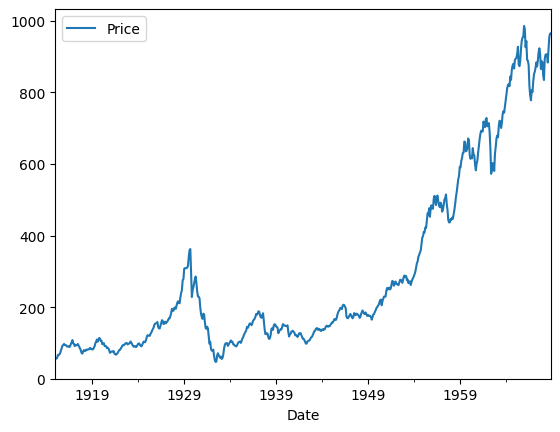

In [31]:
#plot dow jones data from series
dow.plot()

#### Choosing A Plot

Below, plots are shown first for single quantiative variables, then single categorical variables.  Next, two continuous variables, one continuous vs. one categorical, and any mix of continuous and categorical.

#### Histogram

A histogram *is an approximate representation of the distribution of numerical data*.  This is a plot we use for any single continuous feature to better understand the shape of the data.  

(array([  0.,   0.,   0.,   0.,   0., 244.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

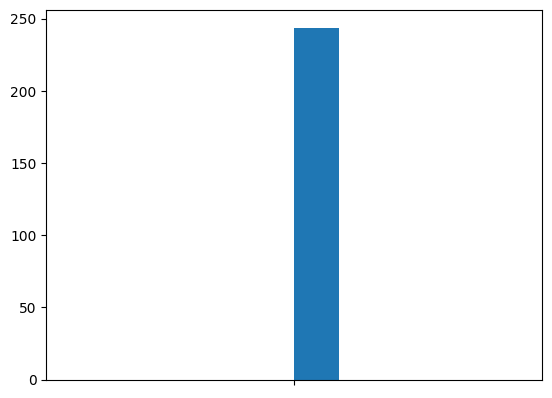

In [32]:
### tip percentage histogram
plt.hist(tips['tip_pct'])

<Axes: >

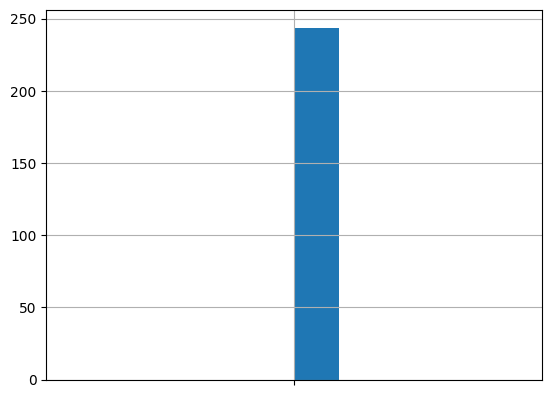

In [33]:
### as a method with the series
tips['tip_pct'].hist()

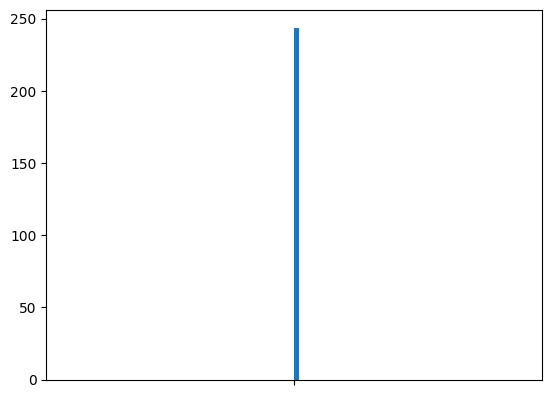

In [34]:
### adjusting the bin number
plt.hist(tips['tip_pct'], bins = 100);

(array([  0.,   0.,   0.,   0.,   0., 244.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

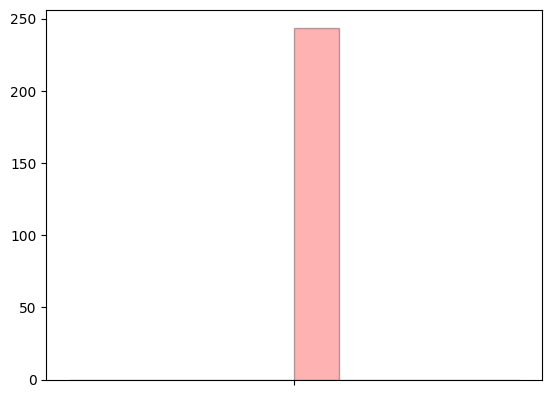

In [35]:
### adding a title, labels, edgecolor, and alpha
plt.hist(tips['tip_pct'], 
         edgecolor = 'black', 
         color = 'red', 
         alpha = 0.3)

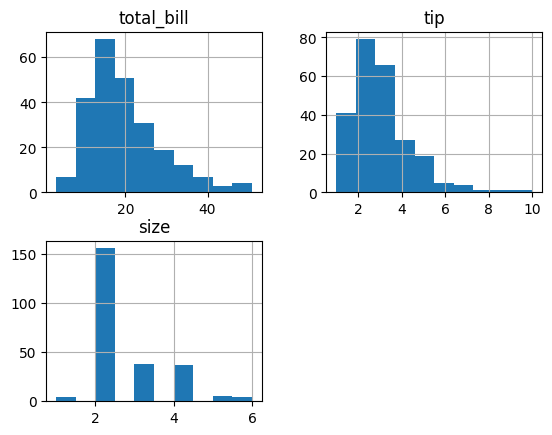

In [36]:
tips.hist();

#### Boxplot

Similar to a histogram, a boxplot can be used on a single quantitative feature.

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

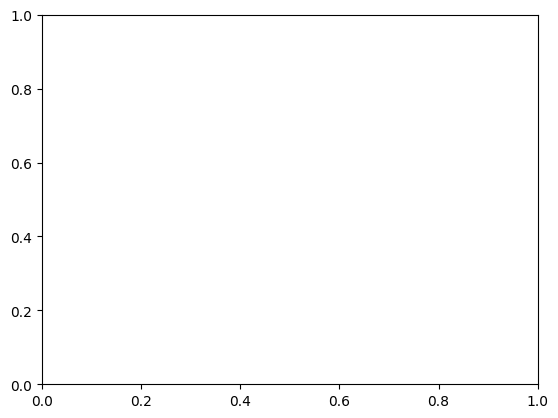

In [37]:
### boxplot of tip percentage
plt.boxplot(tips['tip_pct']);

In [ ]:
### Make a horizontal version of the plot
plt.boxplot(tips['tip_pct'], vert = False);

#### Bar Plot

A bar plot can be used to summarize a single categorical variable.  For example, if you want the counts of each unique category in a categorical feature. 

In [ ]:
### counts of species
tips['size'].value_counts()

In [ ]:
### barplot of counts
tips['size'].value_counts().plot(kind = 'bar')

#### Two Variable Plots

In [ ]:
tips.head()

#### Scatterplot

Two continuous features can be compared using scatterplots.  Typically, one is interested in if a relationship between the features exists and the strength and direction of many datasets.

In [ ]:
### tip % vs tip pct

In [ ]:
### scatterplot of x vs. y


#### `pandas.plotting`

There is not a quick easy plot in `matplotlib` to compare all numeric features in a dataset.  Instead, `pandas.plotting` has a `scatter_matrix` function that serves a similar purpose.

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
### scatter matrix of penguin data
scatter_matrix(tips);

In [ ]:
### adding arguments and changing size
scatter_matrix(tips, diagonal = 'kde', figsize = (10, 10));

#### Subplots and Axes

![](https://matplotlib.org/stable/_images/users-explain-axes-index-1.2x.png)

In [ ]:
### create a 1 row 2 column plot
fig, ax = plt.subplots(1, 2)

In [ ]:
### add a plot to each axis
fig, ax = plt.subplots(1, 2)


In [ ]:
### create a 2 x 2 grid of plots
### add histogram to bottom right plot
fig, ax = plt.subplots(2, 2, figsize = (10, 8))


#### Summary

Great job!  We will get practice plotting in this weeks homework and examine some other libraries and approaches during class next week.  For now, make sure you are familiar with the basic plots above -- histogram, boxplot, bar plot, scatterplot -- and when to use each.  